In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [310]:
dataset = pd.read_csv('../Datasets/Dataset.csv')

# 1.) Exploratory Data Analysis

In [311]:
dataset.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [312]:
dataset.drop(['encounter_id', 'patient_id','hospital_id'], axis=1, inplace=True)

In [313]:
dataset.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [314]:
dataset.shape

(91713, 183)

In [315]:
dataset.isnull().sum().sort_values(ascending=False).head(80)

h1_bilirubin_min         84619
h1_bilirubin_max         84619
h1_lactate_min           84369
h1_lactate_max           84369
h1_albumin_max           83824
                         ...  
h1_temp_min              21732
h1_temp_max              21732
hospital_admit_source    21409
hematocrit_apache        19878
bun_apache               19262
Length: 80, dtype: int64

In [316]:
features_to_drop = dataset.isnull().sum().sort_values(ascending=False).head(80).index
dataset.drop(features_to_drop, axis=1, inplace=True)
dataset.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


## Separating Continuous and Categorical features

In [317]:
cont_features = list()
cat_features = list()

In [318]:
def getNUniquesount(feature):
  nUnique = dataset[feature].nunique()
  if nUnique > 15 :
    cont_features.append(feature)
  else:
    cat_features.append(feature)
  #print('{} : {}'.format(feature, nUnique))

In [319]:
def getValueCount(dataset, feature):
  print('{} : {}'.format(feature, dataset[feature].value_counts()))
  print()

In [320]:
for feature in dataset.columns:
  getNUniquesount(feature)

In [321]:
print(len(cont_features))
print(cont_features)

77
['age', 'bmi', 'height', 'icu_id', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'creatinine_apache', 'glucose_apache', 'heart_rate_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_mi

In [322]:
print(len(cat_features))
print(cat_features)

26
['hospital_death', 'elective_surgery', 'ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'readmission_status', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem', 'apache_2_bodysystem']


In [323]:
dataset_cont = dataset[cont_features]
dataset_cat = dataset[cat_features]

## Working on Continuous Features

In [324]:
dataset_cont.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,creatinine_apache,glucose_apache,...,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.73,180.3,92,0.541667,73.9,113.0,502.01,2.51,168.0,...,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05
1,77.0,27.42,160.0,90,0.927778,70.2,108.0,203.01,0.56,145.0,...,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29
2,25.0,31.95,172.7,93,0.000694,95.3,122.0,703.03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
3,81.0,22.64,165.1,92,0.000694,61.7,203.0,1206.03,NaN,185.0,...,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,0.04,0.03
4,19.0,NaN,188.0,91,0.073611,NaN,119.0,601.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
dataset_cont.shape

(91713, 77)

In [327]:
missing_df_cont = pd.DataFrame(dataset_cont.isnull().sum(), columns=['Count'])
missing_df_cont['Percentage'] = (missing_df_cont['Count']/dataset_cont.shape[0]) * 100
missing_df_cont.sort_values(by=['Count'], ascending=False).head(60)

,Count,Percentage
creatinine_apache,18853,20.556519
sodium_apache,18600,20.280658
d1_hco3_max,15071,16.432785
d1_hco3_min,15071,16.432785
d1_platelets_max,13444,14.658772
d1_platelets_min,13444,14.658772
d1_wbc_min,13174,14.364376
d1_wbc_max,13174,14.364376
d1_calcium_min,13069,14.249888
d1_calcium_max,13069,14.249888


### Missing values less than 5%

In [328]:
features_with_5 = missing_df_cont[(missing_df_cont['Percentage'] > 0) & (missing_df_cont['Percentage']<=5)].sort_values(by = ['Count'], ascending=False).index
print(len(features_with_5))
print(features_with_5)

40
Index(['h1_resprate_min', 'h1_resprate_max', 'age', 'h1_spo2_min',
       'h1_spo2_max', 'temp_apache', 'h1_diasbp_min', 'h1_diasbp_max',
       'h1_sysbp_max', 'h1_sysbp_min', 'bmi', 'h1_heartrate_min',
       'h1_heartrate_max', 'weight', 'd1_temp_min', 'd1_temp_max',
       'apache_2_diagnosis', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'height', 'resprate_apache',
       'apache_3j_diagnosis', 'd1_diasbp_noninvasive_min',
       'd1_diasbp_noninvasive_max', 'd1_sysbp_noninvasive_max',
       'd1_sysbp_noninvasive_min', 'map_apache', 'heart_rate_apache',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min', 'd1_spo2_max',
       'd1_mbp_min', 'd1_mbp_max', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_sysbp_max', 'd1_sysbp_min', 'd1_heartrate_min', 'd1_heartrate_max'],
      dtype='object')


In [358]:
def evaluateCAA(feature):
  fig = plt.figure()
  ax =fig.add_subplot(111)

  # original data
  dataset_cont[feature].plot.density(color='red')
  #dataset_cont[feature].hist(bins=50, ax=ax, density=True, color='red')

  # caa data
  dataset_cont[feature].dropna().plot.density(color='green')
  #dataset_cont[feature].dropna().hist(bins=50, ax=ax, density=True, color='blue')


  plt.title('For {}'.format(feature))

C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_21640/2910676141.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


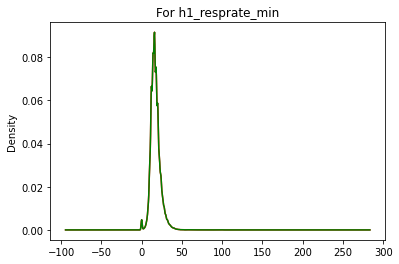

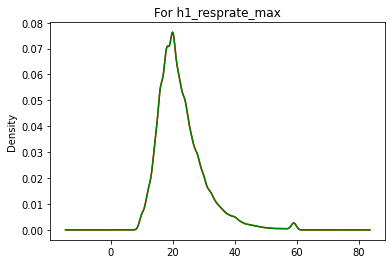

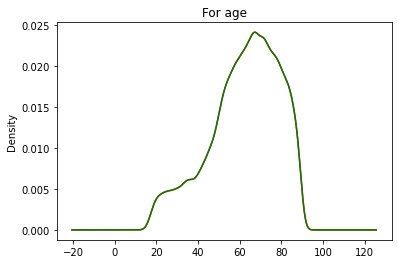

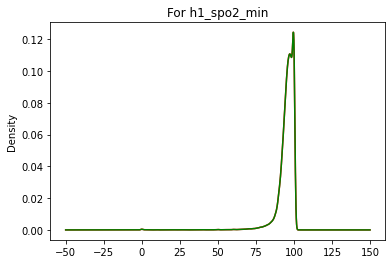

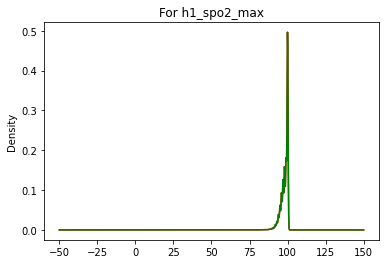

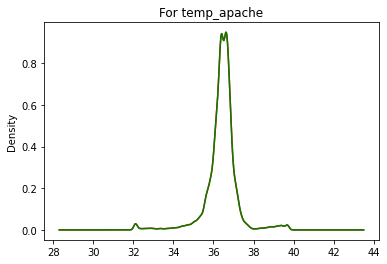

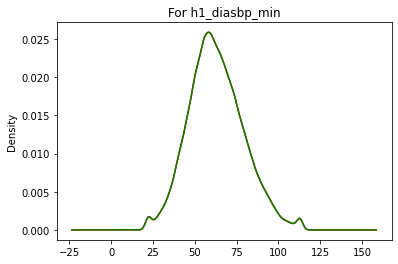

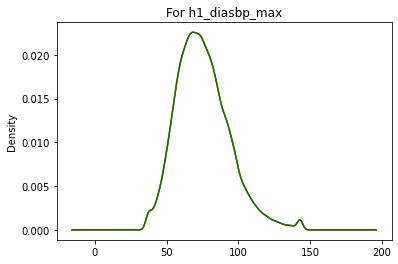

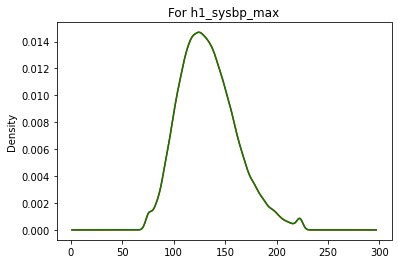

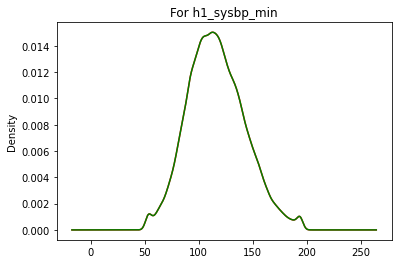

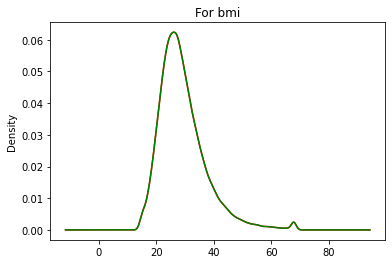

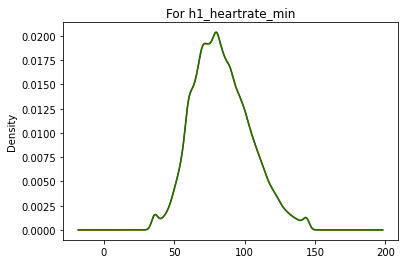

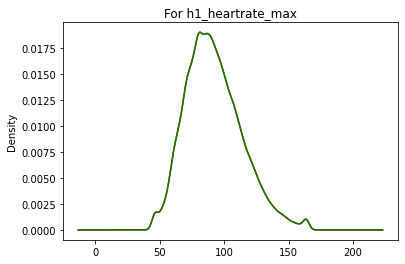

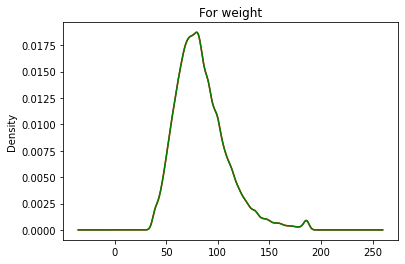

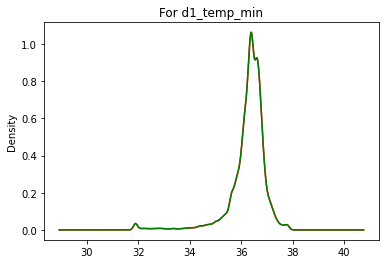

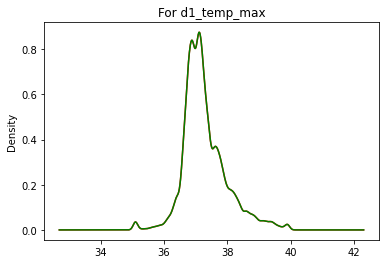

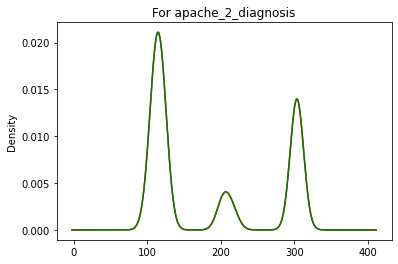

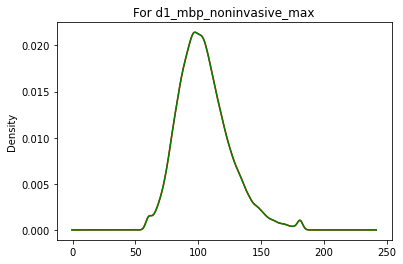

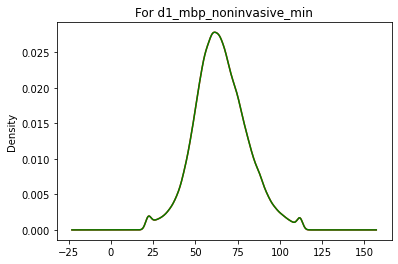

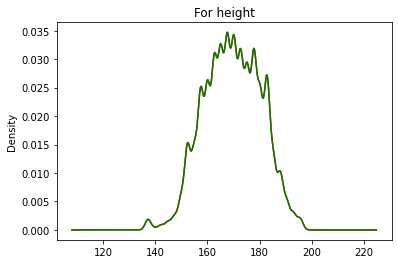

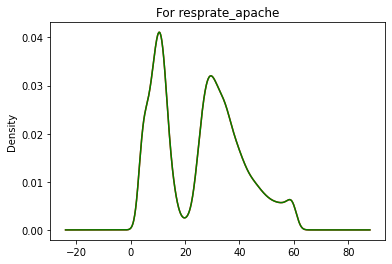

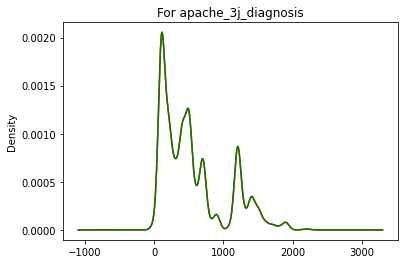

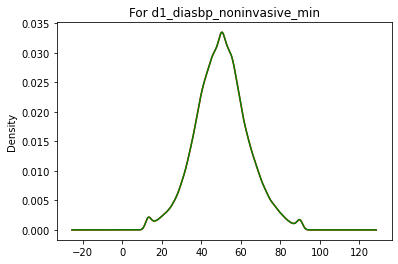

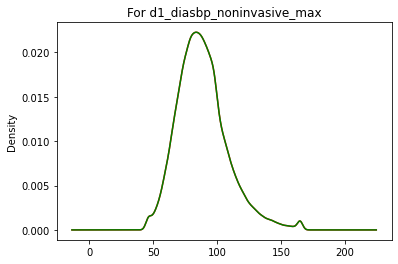

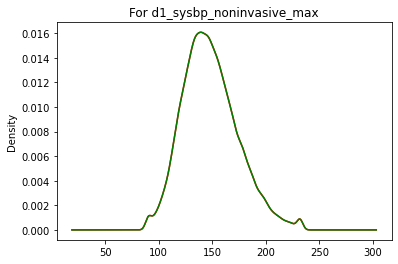

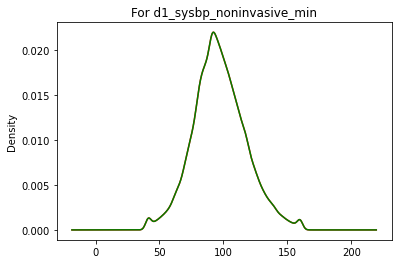

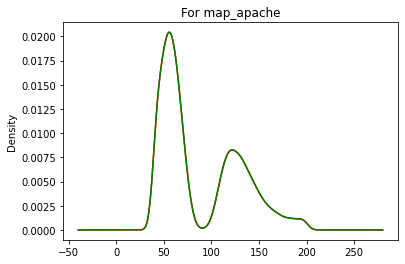

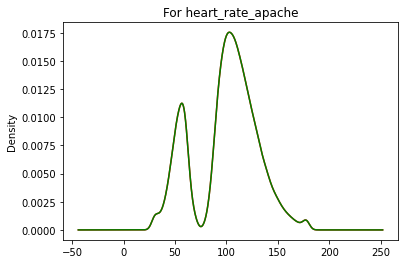

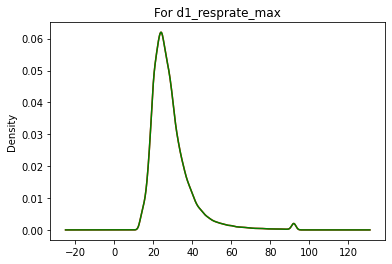

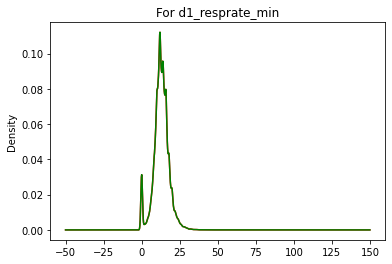

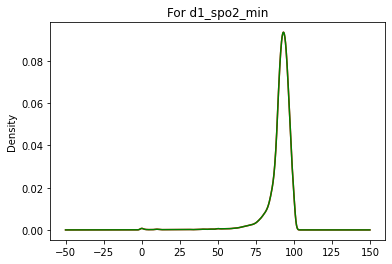

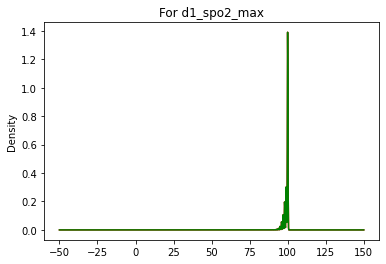

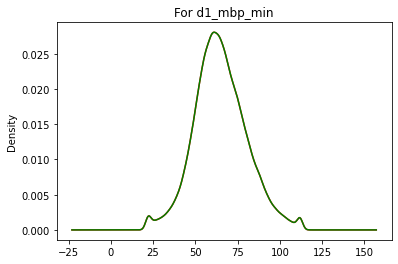

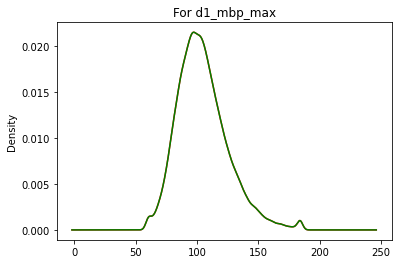

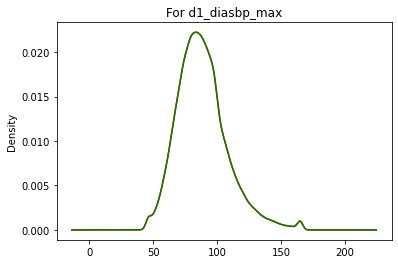

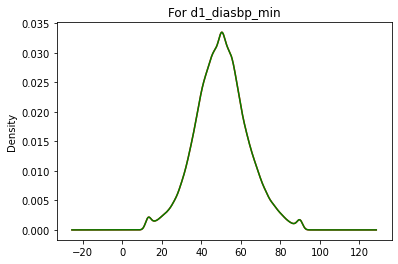

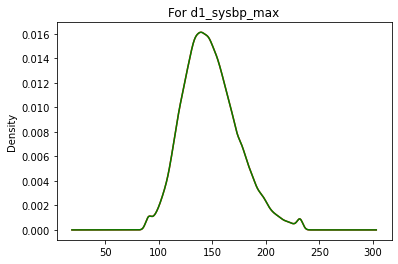

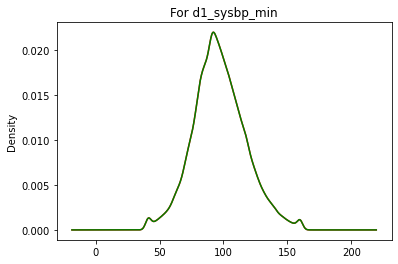

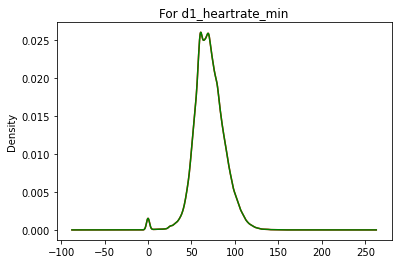

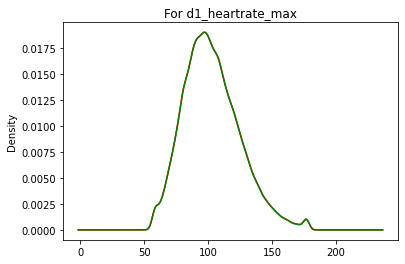

In [340]:
for feature in features_with_5:
  evaluateCAA(feature)

#### For the features with less than 5% missing values, the distribution did not change. So we can drop the rows.

### Missing values greater than 5%

In [342]:
features_with_above_5 = missing_df_cont[missing_df_cont['Percentage'] > 5].sort_values(by = ['Count'], ascending=False).index
print(len(features_with_above_5))
print(features_with_above_5)

35
Index(['creatinine_apache', 'sodium_apache', 'd1_hco3_min', 'd1_hco3_max',
       'd1_platelets_min', 'd1_platelets_max', 'd1_wbc_max', 'd1_wbc_min',
       'd1_calcium_max', 'd1_calcium_min', 'd1_hemaglobin_min',
       'd1_hemaglobin_max', 'd1_hematocrit_min', 'd1_hematocrit_max',
       'glucose_apache', 'd1_bun_max', 'd1_bun_min', 'd1_sodium_min',
       'd1_sodium_max', 'd1_creatinine_max', 'd1_creatinine_min',
       'd1_potassium_max', 'd1_potassium_min', 'h1_mbp_noninvasive_max',
       'h1_mbp_noninvasive_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'h1_diasbp_noninvasive_min',
       'h1_diasbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
       'h1_sysbp_noninvasive_max', 'd1_glucose_min', 'd1_glucose_max',
       'h1_mbp_min', 'h1_mbp_max'],
      dtype='object')


C:\Users\PRIYES~1\AppData\Local\Temp/ipykernel_21640/2487486822.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


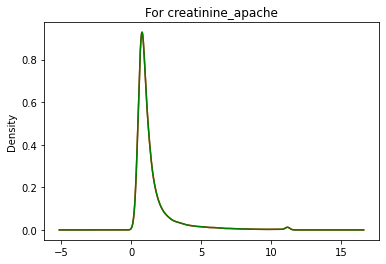

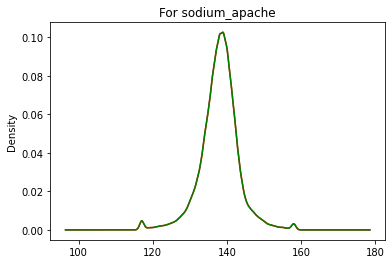

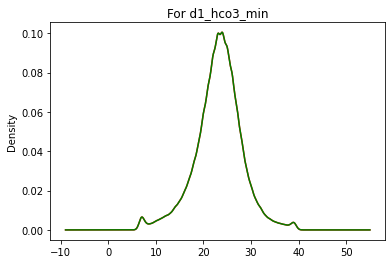

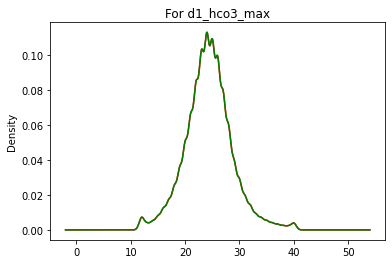

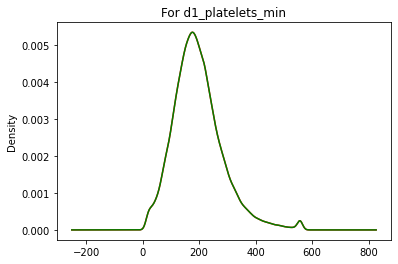

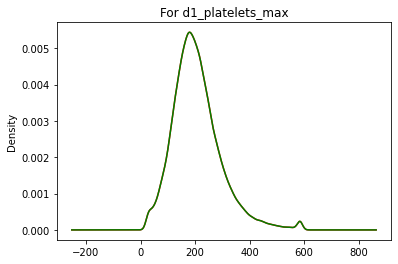

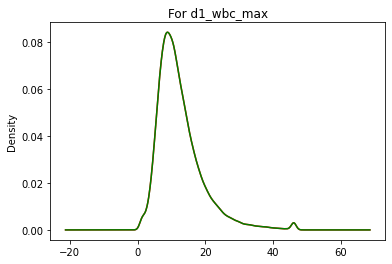

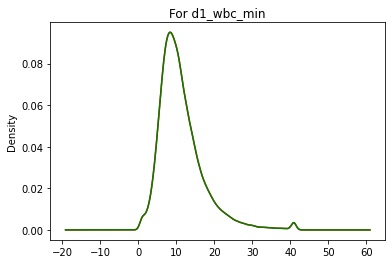

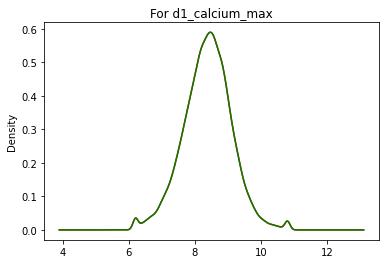

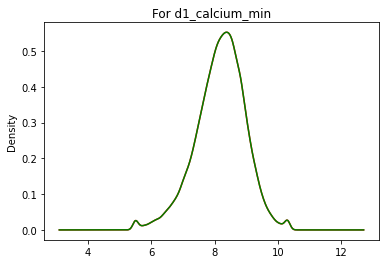

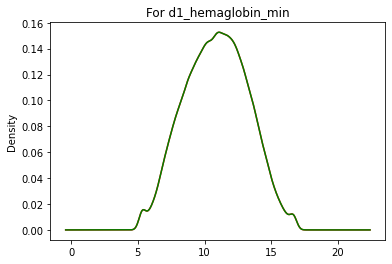

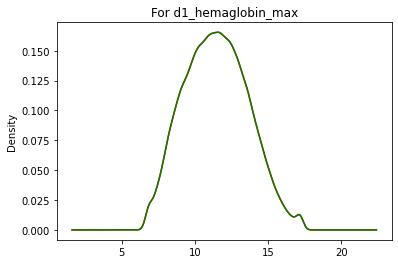

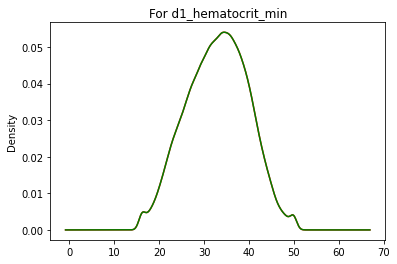

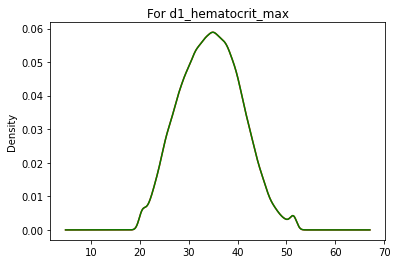

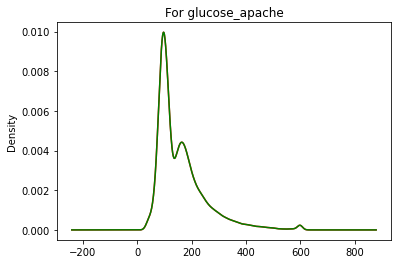

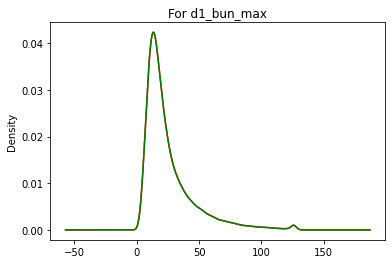

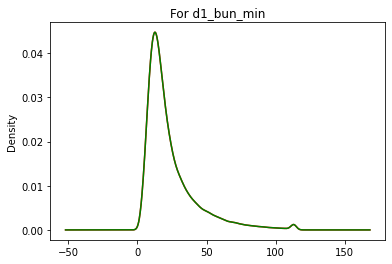

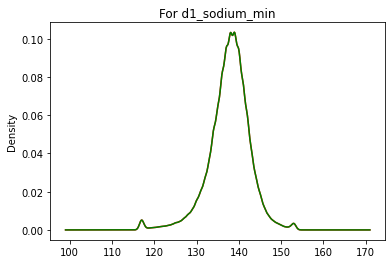

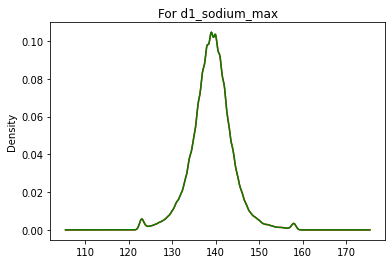

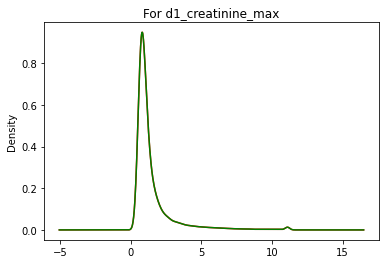

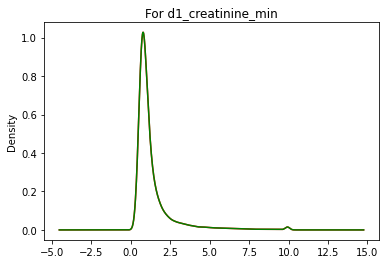

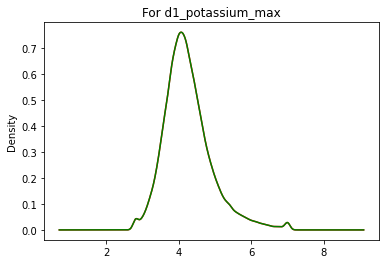

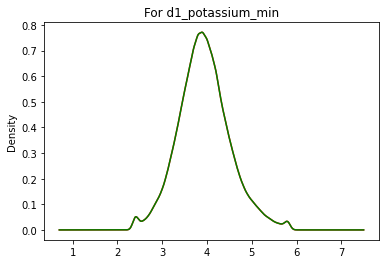

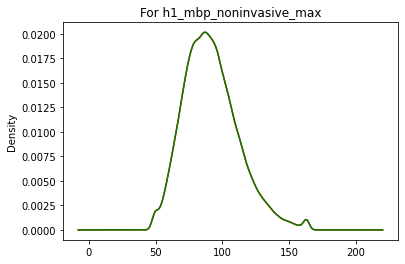

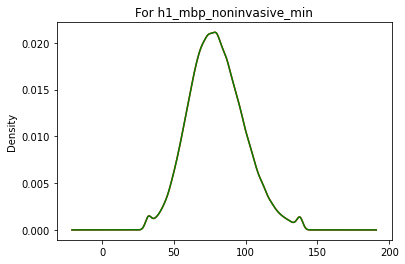

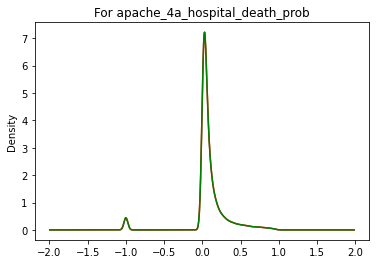

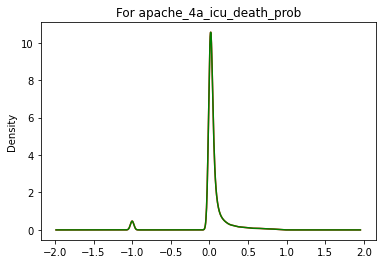

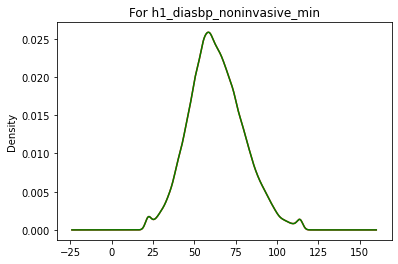

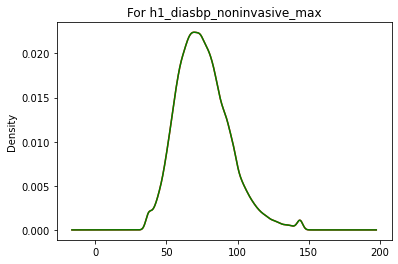

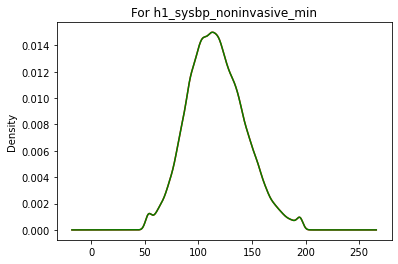

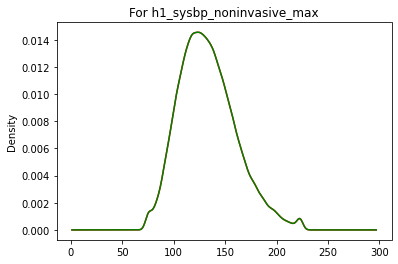

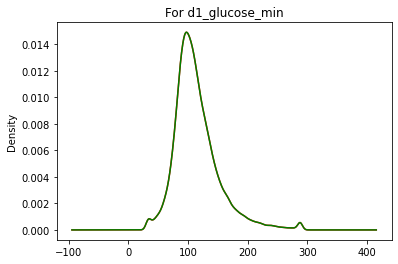

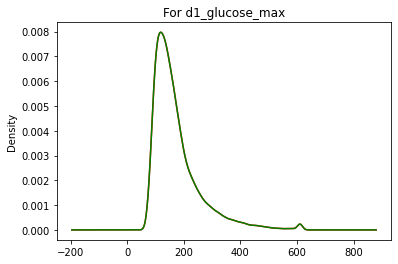

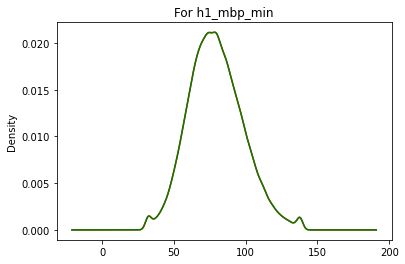

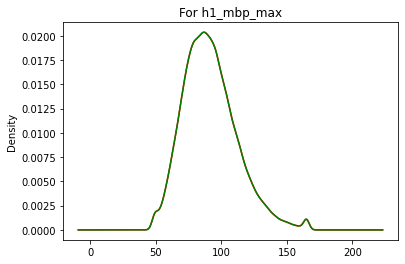

In [360]:
for feature in features_with_above_5:
  evaluateCAA(feature)

#### For the features with greater than 5% missing values, the distribution did not change. So we can drop the rows.

In [361]:
dataset_cont.shape

(91713, 77)

In [365]:
dataset_cont.dropna(inplace=True)
dataset_cont.shape

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(43931, 77)

## Working with Categorical Features

In [366]:
dataset_cat.head()

,hospital_death,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,readmission_status,apache_post_operative,arf_apache,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,0,Caucasian,M,Floor,admit,CTICU,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,0,Caucasian,F,Floor,admit,Med-Surg ICU,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,0,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,1,Caucasian,F,Operating Room / Recovery,admit,CTICU,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [367]:
dataset_cat.shape

(91713, 26)

## EDA on Continuous Dataset

In [37]:
dataset_cont.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,bilirubin_apache,...,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.73,180.3,92,0.541667,73.9,2.3,113.0,502.01,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05
1,77.0,27.42,160.0,90,0.927778,70.2,NaN,108.0,203.01,NaN,...,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0.47,0.29
2,25.0,31.95,172.7,93,0.000694,95.3,NaN,122.0,703.03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
3,81.0,22.64,165.1,92,0.000694,61.7,NaN,203.0,1206.03,NaN,...,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0.04,0.03
4,19.0,NaN,188.0,91,0.073611,NaN,NaN,119.0,601.01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
dataset_cont.describe()

,age,bmi,height,icu_id,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,bilirubin_apache,...,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
count,87485.000000,88284.000000,90379.000000,91713.000000,91713.000000,88993.000000,37334.000000,90051.000000,90612.000000,33579.000000,...,15754.000000,15754.000000,15289.000000,15289.000000,15768.000000,15768.000000,11518.000000,11518.000000,83766.000000,83766.000000
mean,62.309516,29.185818,169.641588,508.357692,0.835766,84.028340,2.902968,185.401739,558.216377,1.147721,...,44.668444,43.383453,7.338363,7.327883,163.841354,144.154224,244.404982,235.933050,0.086787,0.043955
std,16.775119,8.275142,10.795378,228.989661,2.487756,25.011497,0.681863,86.050882,463.266985,2.165538,...,14.630907,14.113107,0.105821,0.107873,113.455738,98.464543,129.964308,126.458507,0.247569,0.217341
min,16.000000,14.844926,137.200000,82.000000,-24.947222,38.600000,1.200000,101.000000,0.010000,0.100000,...,15.000000,14.997000,6.930000,6.900000,34.000000,31.000000,42.000000,38.000000,-1.000000,-1.000000
25%,52.000000,23.641975,162.500000,369.000000,0.035417,66.800000,2.400000,113.000000,203.010000,0.400000,...,36.000000,35.000000,7.290000,7.280000,80.700000,77.000000,142.000000,136.000000,0.020000,0.010000
50%,65.000000,27.654655,170.100000,504.000000,0.138889,80.300000,2.900000,122.000000,409.020000,0.600000,...,42.100000,41.000000,7.350000,7.340000,120.000000,107.000000,223.333333,214.000000,0.050000,0.020000
75%,75.000000,32.930206,177.800000,679.000000,0.409028,97.100000,3.400000,301.000000,703.030000,1.100000,...,49.200000,48.000000,7.410000,7.400000,216.000000,178.000000,328.000000,317.475000,0.130000,0.060000
max,89.000000,67.814990,195.590000,927.000000,159.090972,186.000000,4.600000,308.000000,2201.050000,51.000000,...,111.505000,107.000000,7.570000,7.563000,534.905000,514.905000,720.000000,654.813793,0.990000,0.970000


In [39]:
dataset.shape

(91713, 183)

In [40]:
null_features = dataset_cont.isnull().sum().sort_values(ascending =False).head(60).index
null_features

Index(['h1_bilirubin_min', 'h1_bilirubin_max', 'h1_lactate_min',
       'h1_lactate_max', 'h1_albumin_max', 'h1_albumin_min',
       'h1_pao2fio2ratio_min', 'h1_pao2fio2ratio_max', 'h1_arterial_ph_max',
       'h1_arterial_ph_min', 'h1_hco3_min', 'h1_hco3_max',
       'h1_arterial_pco2_min', 'h1_arterial_pco2_max', 'h1_wbc_max',
       'h1_wbc_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min',
       'h1_calcium_min', 'h1_calcium_max', 'h1_platelets_max',
       'h1_platelets_min', 'h1_bun_max', 'h1_bun_min', 'h1_creatinine_min',
       'h1_creatinine_max', 'h1_diasbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_mbp_invasive_min',
       'h1_mbp_invasive_max', 'h1_hematocrit_min', 'h1_hematocrit_max',
       'h1_hemaglobin_min', 'h1_hemaglobin_max', 'h1_sodium_min',
       'h1_sodium_max', 'h1_potassium_min', 'h1_potassium_max', 'fio2_apache',
       'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache',
       'd1_l

In [41]:
dataset_cont.drop(null_features, axis=1, inplace=True)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
dataset_cont.shape

(91713, 96)

In [43]:
dataset_cont.isnull().sum().sort_values(ascending =False).head(60)

d1_arterial_po2_max              59262
bilirubin_apache                 58134
d1_inr_max                       57941
h1_inr_min                       57941
h1_inr_max                       57941
d1_inr_min                       57941
albumin_apache                   54379
d1_bilirubin_max                 53673
d1_bilirubin_min                 53673
h1_glucose_min                   52614
h1_glucose_max                   52614
d1_albumin_min                   49096
d1_albumin_max                   49096
urineoutput_apache               48998
wbc_apache                       22012
h1_temp_min                      21732
h1_temp_max                      21732
hematocrit_apache                19878
bun_apache                       19262
creatinine_apache                18853
sodium_apache                    18600
d1_hco3_max                      15071
d1_hco3_min                      15071
d1_platelets_min                 13444
d1_platelets_max                 13444
d1_wbc_min               

In [44]:
null_features = dataset_cont.isnull().sum().sort_values(ascending =False).head(14).index
dataset_cont.drop(null_features, axis=1, inplace=True)

In [45]:
dataset_cont.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,...,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.73,180.3,92,0.541667,73.9,113.0,502.01,31.0,2.51,...,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,0.10,0.05
1,77.0,27.42,160.0,90,0.927778,70.2,108.0,203.01,9.0,0.56,...,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,0.47,0.29
2,25.0,31.95,172.7,93,0.000694,95.3,122.0,703.03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
3,81.0,22.64,165.1,92,0.000694,61.7,203.0,1206.03,NaN,NaN,...,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,0.04,0.03
4,19.0,NaN,188.0,91,0.073611,NaN,119.0,601.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
dataset_cont.isnull().sum().sort_values(ascending=False).head(40)

wbc_apache                       22012
h1_temp_max                      21732
h1_temp_min                      21732
hematocrit_apache                19878
bun_apache                       19262
creatinine_apache                18853
sodium_apache                    18600
d1_hco3_max                      15071
d1_hco3_min                      15071
d1_platelets_min                 13444
d1_platelets_max                 13444
d1_wbc_max                       13174
d1_wbc_min                       13174
d1_calcium_min                   13069
d1_calcium_max                   13069
d1_hemaglobin_max                12147
d1_hemaglobin_min                12147
d1_hematocrit_max                11654
d1_hematocrit_min                11654
glucose_apache                   11036
d1_bun_min                       10514
d1_bun_max                       10514
d1_sodium_max                    10195
d1_sodium_min                    10195
d1_creatinine_min                10169
d1_creatinine_max        

In [47]:
def meanImpute(value,mean):
  if pd.isna(value):
    return mean
  else:
    return value

In [48]:
for feature in dataset_cont.columns:
  mean = np.mean(dataset_cont[feature])
  dataset_cont[feature] = dataset_cont[feature].apply(meanImpute, mean=mean)

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [49]:
dataset_cont.isnull().sum()

age                              0
bmi                              0
height                           0
icu_id                           0
pre_icu_los_days                 0
                                ..
d1_sodium_min                    0
d1_wbc_max                       0
d1_wbc_min                       0
apache_4a_hospital_death_prob    0
apache_4a_icu_death_prob         0
Length: 82, dtype: int64

In [50]:
dataset_cont.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,...,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.730000,180.3,92,0.541667,73.90000,113.0,502.01,31.00000,2.510000,...,233.000000,233.000000,4.000000,3.400000,136.000000,134.000000,14.100000,14.100000,0.100000,0.050000
1,77.0,27.420000,160.0,90,0.927778,70.20000,108.0,203.01,9.00000,0.560000,...,557.000000,487.000000,4.200000,3.800000,145.000000,145.000000,23.300000,12.700000,0.470000,0.290000
2,25.0,31.950000,172.7,93,0.000694,95.30000,122.0,703.03,25.82533,1.480014,...,207.105674,196.769779,4.251594,3.934658,139.124101,137.722144,12.476302,11.313536,0.000000,0.000000
3,81.0,22.640000,165.1,92,0.000694,61.70000,203.0,1206.03,25.82533,1.480014,...,198.000000,43.000000,5.000000,3.500000,139.124101,137.722144,9.000000,8.000000,0.040000,0.030000
4,19.0,29.185818,188.0,91,0.073611,84.02834,119.0,601.01,25.82533,1.480014,...,207.105674,196.769779,4.251594,3.934658,139.124101,137.722144,12.476302,11.313536,0.086787,0.043955


In [51]:
dataset_cont.describe()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,...,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,...,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,62.309516,29.185818,169.641588,508.357692,0.835766,84.028340,185.401739,558.216377,25.825330,1.480014,...,207.105674,196.769779,4.251594,3.934658,139.124101,137.722144,12.476302,11.313536,0.086787,0.043955
std,16.383883,8.118970,10.716578,228.989661,2.487756,24.637809,85.267612,460.477835,18.374232,1.359949,...,82.801190,81.464830,0.631519,0.548486,4.539928,4.642317,6.289153,5.506867,0.236599,0.207712
min,16.000000,14.844926,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,4.000000,0.300000,...,27.000000,18.550000,2.800000,2.400000,123.000000,117.000000,1.200000,0.900000,-1.000000,-1.000000
25%,53.000000,23.787760,162.560000,369.000000,0.035417,67.300000,113.000000,203.010000,14.000000,0.790000,...,157.000000,148.000000,3.900000,3.600000,137.000000,136.000000,8.500000,7.900000,0.020000,0.010000
50%,64.000000,28.007812,170.000000,504.000000,0.138889,81.400000,123.000000,410.010000,24.000000,1.200000,...,207.105674,196.769779,4.200000,3.934658,139.124101,137.722144,12.180000,11.100000,0.060000,0.030000
75%,75.000000,32.653061,177.800000,679.000000,0.409028,96.300000,301.000000,703.030000,27.000000,1.480014,...,240.000000,231.000000,4.500000,4.200000,141.000000,140.000000,14.300000,12.930000,0.120000,0.060000
max,89.000000,67.814990,195.590000,927.000000,159.090972,186.000000,308.000000,2201.050000,127.000000,11.180000,...,585.000000,557.450000,7.000000,5.800000,158.000000,153.000000,46.080000,40.898000,0.990000,0.970000


## EDA on Categorical Dataset

In [52]:
dataset_cat.head()

,hospital_death,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,readmission_status,apache_post_operative,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,0,Caucasian,M,Floor,Floor,admit,CTICU,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,0,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,0,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,1,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,0,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [53]:
dataset_cat.isnull().sum()

hospital_death                     0
elective_surgery                   0
ethnicity                       1395
gender                            25
hospital_admit_source          21409
icu_admit_source                 112
icu_stay_type                      0
icu_type                           0
readmission_status                 0
apache_post_operative              0
arf_apache                       715
gcs_eyes_apache                 1901
gcs_motor_apache                1901
gcs_unable_apache               1037
gcs_verbal_apache               1901
intubated_apache                 715
ventilated_apache                715
aids                             715
cirrhosis                        715
diabetes_mellitus                715
hepatic_failure                  715
immunosuppression                715
leukemia                         715
lymphoma                         715
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
d

In [54]:
cat_feat = dataset_cat.columns
cat_feat

Index(['hospital_death', 'elective_surgery', 'ethnicity', 'gender',
       'hospital_admit_source', 'icu_admit_source', 'icu_stay_type',
       'icu_type', 'readmission_status', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids',
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [55]:
dataset_cat.shape, dataset_cont.shape

((91713, 27), (91713, 82))

In [56]:
intermediate_df = pd.concat([dataset_cont, dataset_cat], axis=1)
intermediate_df.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,68.0,22.730000,180.3,92,0.541667,73.90000,113.0,502.01,31.00000,2.510000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,77.0,27.420000,160.0,90,0.927778,70.20000,108.0,203.01,9.00000,0.560000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,25.0,31.950000,172.7,93,0.000694,95.30000,122.0,703.03,25.82533,1.480014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,81.0,22.640000,165.1,92,0.000694,61.70000,203.0,1206.03,25.82533,1.480014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,19.0,29.185818,188.0,91,0.073611,84.02834,119.0,601.01,25.82533,1.480014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [57]:
intermediate_df.isnull().sum().sort_values(ascending=False).head()

hospital_admit_source    21409
gcs_verbal_apache         1901
gcs_eyes_apache           1901
gcs_motor_apache          1901
apache_2_bodysystem       1662
dtype: int64

In [58]:
intermediate_df.shape

(91713, 109)

In [59]:
intermediate_df.dropna(inplace=True)

In [60]:
intermediate_df.isnull().sum()

age                            0
bmi                            0
height                         0
icu_id                         0
pre_icu_los_days               0
                              ..
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
Length: 109, dtype: int64

In [61]:
intermediate_df.shape

(66845, 109)

# 2.) Data Preprocessing

In [62]:
intermediate_df.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,68.0,22.73,180.3,92,0.541667,73.9,113.0,502.01,31.00000,2.510000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,77.0,27.42,160.0,90,0.927778,70.2,108.0,203.01,9.00000,0.560000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,25.0,31.95,172.7,93,0.000694,95.3,122.0,703.03,25.82533,1.480014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,81.0,22.64,165.1,92,0.000694,61.7,203.0,1206.03,25.82533,1.480014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
5,67.0,27.56,190.5,95,0.000694,100.0,301.0,403.01,13.00000,0.710000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [63]:
y = intermediate_df['hospital_death']
preprocessed_dataset_cat = intermediate_df[cat_feat].drop('hospital_death', axis=1)
preprocessed_dataset_cat.head()

,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,readmission_status,apache_post_operative,arf_apache,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,Caucasian,M,Floor,Floor,admit,CTICU,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,1,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
5,0,Caucasian,M,Direct Admit,Accident & Emergency,admit,Med-Surg ICU,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic


In [64]:
preprocessed_dataset_cat.shape, y.shape

((66845, 26), (66845,))

In [65]:
for feature in preprocessed_dataset_cat.columns:
  getNUniquesount(feature)

elective_surgery : 2
ethnicity : 6
gender : 2
hospital_admit_source : 15
icu_admit_source : 5
icu_stay_type : 3
icu_type : 8
readmission_status : 1
apache_post_operative : 2
arf_apache : 2
gcs_eyes_apache : 4
gcs_motor_apache : 6
gcs_unable_apache : 2
gcs_verbal_apache : 5
intubated_apache : 2
ventilated_apache : 2
aids : 2
cirrhosis : 2
diabetes_mellitus : 2
hepatic_failure : 2
immunosuppression : 2
leukemia : 2
lymphoma : 2
solid_tumor_with_metastasis : 2
apache_3j_bodysystem : 11
apache_2_bodysystem : 10


## Data Cleaning

### ethnicity 

In [66]:
preprocessed_dataset_cat['ethnicity'].value_counts()

Caucasian           53324
African American     6751
Hispanic             2855
Other/Unknown        2511
Asian                 785
Native American       619
Name: ethnicity, dtype: int64

In [67]:
def cleanEthinicity(value):
  if value in ['African American', 'Hispanic', 'Native American']:
    return 'American'
  else:
    return value

In [68]:
def valueCounts(feature):
  print(preprocessed_dataset_cat[feature].value_counts())

In [69]:
preprocessed_dataset_cat['ethnicity'] = preprocessed_dataset_cat['ethnicity'].apply(cleanEthinicity)
valueCounts('ethnicity')

Caucasian        53324
American         10225
Other/Unknown     2511
Asian              785
Name: ethnicity, dtype: int64


### hospital_admit_source

In [70]:
valueCounts('hospital_admit_source')

Emergency Department    35391
Operating Room           9158
Floor                    7720
Direct Admit             6086
Recovery Room            2731
Acute Care/Floor         1752
Other Hospital           1559
Step-Down Unit (SDU)     1065
PACU                      941
Other ICU                 222
Chest Pain Center         127
ICU to SDU                 43
ICU                        34
Observation                10
Other                       6
Name: hospital_admit_source, dtype: int64


In [71]:
def cleanHospital(value):
  if value in ['PACU', 'Other ICU', 'Chest Pain Center', 'ICU to SDU', 'ICU', 'Observation', 'Other']:
    return 'Others'
  else:
    return value

In [72]:
preprocessed_dataset_cat['hospital_admit_source'] = preprocessed_dataset_cat['hospital_admit_source'].apply(cleanHospital)
valueCounts('hospital_admit_source')

Emergency Department    35391
Operating Room           9158
Floor                    7720
Direct Admit             6086
Recovery Room            2731
Acute Care/Floor         1752
Other Hospital           1559
Others                   1383
Step-Down Unit (SDU)     1065
Name: hospital_admit_source, dtype: int64


### icu_admit_source

In [73]:
valueCounts('icu_admit_source')

Accident & Emergency         39754
Operating Room / Recovery    14008
Floor                        11014
Other Hospital                1617
Other ICU                      452
Name: icu_admit_source, dtype: int64


In [74]:
# for feature in preprocessed_dataset_cat.columns:
#   getValueCount(preprocessed_dataset_cat, feature)

In [75]:
features_to_drop = ['aids',
'readmission_status',
'arf_apache',
'gcs_unable_apache',
'cirrhosis',
'hepatic_failure',
'immunosuppression',
'leukemia',
'lymphoma',
'solid_tumor_with_metastasis']

In [76]:
preprocessed_dataset_cat.drop(features_to_drop, axis=1, inplace=True)
preprocessed_dataset_cat.head()

,elective_surgery,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,diabetes_mellitus,apache_3j_bodysystem,apache_2_bodysystem
0,0,Caucasian,M,Floor,Floor,admit,CTICU,0,3.0,6.0,4.0,0.0,0.0,1.0,Sepsis,Cardiovascular
1,0,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,0,1.0,3.0,1.0,0.0,1.0,1.0,Respiratory,Respiratory
2,0,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,0,3.0,6.0,5.0,0.0,0.0,0.0,Metabolic,Metabolic
3,1,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,1,4.0,6.0,5.0,1.0,1.0,0.0,Cardiovascular,Cardiovascular
5,0,Caucasian,M,Direct Admit,Accident & Emergency,admit,Med-Surg ICU,0,4.0,6.0,5.0,0.0,0.0,1.0,Neurological,Neurologic


In [77]:
# for feature in preprocessed_dataset_cat.columns:
#   getValueCount(preprocessed_dataset_cat, feature)

In [78]:
preprocessed_dataset_cat.shape, y.shape

((66845, 16), (66845,))

In [79]:
final_cat_df = pd.get_dummies(preprocessed_dataset_cat['elective_surgery'], prefix = 'elective_surgery', drop_first=True)
final_cat_df.head()

,elective_surgery_1
0,0
1,0
2,0
3,1
5,0


In [80]:
def dummies(feature):
  dummies = pd.get_dummies(preprocessed_dataset_cat[feature], prefix= feature, drop_first=True)
  return dummies

In [81]:
for feature in preprocessed_dataset_cat.columns[1:]:
  dummies_df = dummies(feature)
  final_cat_df = pd.concat([final_cat_df, dummies_df], axis=1)

In [82]:
final_cat_df.head()

,elective_surgery_1,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Other/Unknown,gender_M,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_Operating Room,hospital_admit_source_Other Hospital,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [83]:
final_cat_df.shape, y.shape

((66845, 61), (66845,))

In [84]:
final_cont_df = intermediate_df.drop(cat_feat, axis=1)

In [85]:
final_cont_df.shape, final_cat_df.shape

((66845, 82), (66845, 61))

In [86]:
final_df = pd.concat([final_cont_df, final_cat_df], axis=1)
final_df

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,68.000000,22.730000,180.3,92,0.541667,73.9,113.0,502.01,31.00000,2.510000,...,0,0,0,0,0,0,0,0,0,0
1,77.000000,27.420000,160.0,90,0.927778,70.2,108.0,203.01,9.00000,0.560000,...,0,0,0,0,0,0,1,0,0,0
2,25.000000,31.950000,172.7,93,0.000694,95.3,122.0,703.03,25.82533,1.480014,...,0,0,0,1,0,0,0,0,0,0
3,81.000000,22.640000,165.1,92,0.000694,61.7,203.0,1206.03,25.82533,1.480014,...,0,0,0,0,0,0,0,0,0,0
5,67.000000,27.560000,190.5,95,0.000694,100.0,301.0,403.01,13.00000,0.710000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91706,54.000000,19.770448,177.8,925,0.025694,62.5,109.0,108.01,15.00000,0.700000,...,0,0,0,0,0,0,0,0,0,0
91708,75.000000,23.060250,177.8,927,0.298611,72.9,113.0,501.06,25.82533,1.480014,...,0,0,0,0,0,0,0,0,0,0
91709,56.000000,47.179671,183.0,925,0.120139,158.0,113.0,501.05,34.00000,2.300000,...,0,0,0,0,0,0,0,0,0,0
91710,48.000000,27.236914,170.2,908,0.046528,78.9,123.0,702.01,33.00000,2.300000,...,0,0,0,1,0,0,0,0,0,0


In [87]:
final_df.shape, y.shape

((66845, 143), (66845,))

# 3.) Model Creation

In [88]:
final_df.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,68.0,22.73,180.3,92,0.541667,73.9,113.0,502.01,31.00000,2.510000,...,0,0,0,0,0,0,0,0,0,0
1,77.0,27.42,160.0,90,0.927778,70.2,108.0,203.01,9.00000,0.560000,...,0,0,0,0,0,0,1,0,0,0
2,25.0,31.95,172.7,93,0.000694,95.3,122.0,703.03,25.82533,1.480014,...,0,0,0,1,0,0,0,0,0,0
3,81.0,22.64,165.1,92,0.000694,61.7,203.0,1206.03,25.82533,1.480014,...,0,0,0,0,0,0,0,0,0,0
5,67.0,27.56,190.5,95,0.000694,100.0,301.0,403.01,13.00000,0.710000,...,0,0,0,0,1,0,0,0,0,0


In [89]:
X = final_df.copy()

In [90]:
X.shape, y.shape

((66845, 143), (66845,))

In [93]:
X.head()

,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,...,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,68.0,22.73,180.3,92,0.541667,73.9,113.0,502.01,31.00000,2.510000,...,0,0,0,0,0,0,0,0,0,0
1,77.0,27.42,160.0,90,0.927778,70.2,108.0,203.01,9.00000,0.560000,...,0,0,0,0,0,0,1,0,0,0
2,25.0,31.95,172.7,93,0.000694,95.3,122.0,703.03,25.82533,1.480014,...,0,0,0,1,0,0,0,0,0,0
3,81.0,22.64,165.1,92,0.000694,61.7,203.0,1206.03,25.82533,1.480014,...,0,0,0,0,0,0,0,0,0,0
5,67.0,27.56,190.5,95,0.000694,100.0,301.0,403.01,13.00000,0.710000,...,0,0,0,0,1,0,0,0,0,0


In [94]:
y.head()

0    0
1    0
2    0
3    0
5    0
Name: hospital_death, dtype: int64

## PCA

In [102]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [96]:
pca = PCA(n_components=2)
decomposed_X = pca.fit_transform(X)
decomposed_X

array([[ -65.56219396, -384.6118849 ],
       [-370.20204247, -388.09099005],
       [ 135.54120382, -380.83182471],
       ...,
       [ -80.5325165 ,  447.57663432],
       [ 120.36280702,  438.98374905],
       [-380.20201027,  438.36448158]])

<AxesSubplot:>

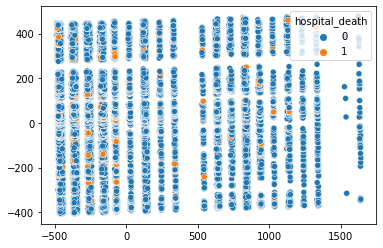

In [101]:
sns.scatterplot(x = decomposed_X[:,0],  y = decomposed_X[:,1], hue=y)

## SmoteTomek

In [381]:
from imblearn.combine import SMOTETomek

In [382]:
st = SMOTETomek(random_state=42)
X_resampled, y_resampled = st.fit_resample(X, y)
X_resampled.shape, y_resampled.shape

((122126, 143), (122126,))

In [384]:
ss = StandardScaler()
X_Scaled = ss.fit_transform(X_resampled)
X_Scaled

array([[ 0.18977462, -0.78079242,  1.09274743, ..., -0.18539154,
        -0.04689649, -0.16416658],
       [ 0.80031194, -0.15857286, -0.96201695, ..., -0.18539154,
        -0.04689649, -0.16416658],
       [-2.72723706,  0.4424196 ,  0.32347604, ..., -0.18539154,
        -0.04689649, -0.16416658],
       ...,
       [ 0.26835346,  2.15872618,  0.25077591, ..., -0.18539154,
        -0.04689649, -0.16416658],
       [-1.20164369, -0.22990449,  0.11133347, ..., -0.18539154,
        -0.04689649, -0.16416658],
       [ 0.70412581, -1.12641468, -0.16627194, ..., -0.18539154,
        -0.04689649, -0.16416658]])

In [392]:
X_Scaled.shape, y_resampled.shape

((122126, 143), (122126,))

In [393]:
y_resampled.value_counts()

0    61063
1    61063
Name: hospital_death, dtype: int64

In [438]:
X.shape, y.shape

((66845, 143), (66845,))

In [388]:
# Importing Packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

In [522]:
# Neural network
model = Sequential()
model.add(Dense(100, input_dim=143, activation='sigmoid'))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(40, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [523]:
y_resampled_ = np.array(y_resampled).reshape(-1,1)

In [524]:
X_Scaled.shape, y_resampled_.shape

((122126, 143), (122126, 1))

In [529]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [530]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=50, batch_size=562)

Epoch 1/50
80/80 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9129 - val_loss: 0.0000e+00 - val_accuracy: 0.9152
Epoch 2/50
80/80 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9129 - val_loss: 0.0000e+00 - val_accuracy: 0.9152
Epoch 3/50
80/80 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9129 - val_loss: 0.0000e+00 - val_accuracy: 0.9152
Epoch 4/50
80/80 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9129 - val_loss: 0.0000e+00 - val_accuracy: 0.9152
Epoch 5/50
80/80 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9129 - val_loss: 0.0000e+00 - val_accuracy: 0.9152
Epoch 6/50
80/80 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9129 - val_loss: 0.0000e+00 - val_accuracy: 0.9152
Epoch 7/50
80/80 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9129 - val_loss

In [531]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [532]:
accuracy_score(y_test, y_pred)

0.9152273448479079

In [533]:
confusion_matrix(y_test, y_pred)

array([[20189,     0],
       [ 1870,     0]], dtype=int64)

In [534]:
testData = np.array(final_df.iloc[randomNumber]).reshape(1,-1)
testData.shape

(1, 143)

In [553]:
randomNumber = np.random.randint(0, 66845)
testData = np.array(final_df.iloc[randomNumber]).reshape(1,-1)
print('Predicted: ', int(model.predict(testData)[0][0]))
print('Actual: ', y.iloc[randomNumber])

Predicted:  0
Actual:  0
